## Customer segmentation

You are the owner of a shop. It doesn't matter if you own an e-commerce or a  supermarket. It doesn't matter if it is a small shop or a huge company such as Amazon or Netflix, it's better to know your customers.

You were able to collect basic data about your customers holding a membership card such as Customer ID, age, gender, annual income, and spending score. This last one is a score based on customer behavior and purchasing data.
There are some new products on the market that you are interested in selling. But you want to target a specific type of clients for each one of the products.  

Machine learning comes in handy for this task. Particularly, clustering, the most important unsupervised learning problem, is able to create categories grouping similar individuals.
These categories are called clusters. A cluster is a collection of points in a dataset. These points are more similar between them than they are to points belonging to other clusters.
Distance-based clustering groups the points into some number of clusters such that distances within the cluster should be small while distances between clusters should be large.

### Import modules requiered

First of all, we need to import the required module. 

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

For this particular project, we'll work with two `scikit-learn` modules: `Kmeans` and `PCA`. They will allow us to perform a clustering algorithm and dimensionality reduction.

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
import seaborn as sns
%matplotlib inline

In [6]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

### Read data into a DataFrame

We read the basic data stored in the [customers.csv](https://www.kaggle.com/akram24/mall-customers) file into a `DataFrame` using pandas. 

In [7]:
customers = pd.read_csv("customers.csv")

We check the first five rows of the DataFrame. We can see that we have: CustumerID, Gender, Age, Annual Income expressed as price x1000, and the spending score as we expected.

In [8]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploring the data

Now, it's time to explore the data to check the quality of the data and the distribution of the variables.

First, we check that if there is any missing value in the dataset. K-means algorithm is not able to deal with missing values. 

In [9]:
print(f"Missing values in each variable: \n{customers.isnull().sum()}")

Missing values in each variable: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Fortunately, there is no missing data. We can also check if there are duplicated rows.

In [10]:
print(f"Duplicated rows: {customers.duplicated().sum()}")

Duplicated rows: 0


Finally, we check how each variable is presented in the DataFrame. Categorical variables cannot be handled directly. K-means is based on distances. The approach for converting those variables depend on the type of categorical variables. 

In [11]:
print(f"Variable:                  Type: \n{customers.dtypes}") 

Variable:                  Type: 
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


After that, we can start observing the distribution of the variables. Here, we'll define two functions. The first one will retrieve descriptive statistics of the variables. The second one will help us graph the variable distribution.

#### Descriptive statistics and Distribution.

For the descriptive statistcs, we'll get mean, standard deviation, median and variance. If the variable is not numeric, we'll get the counts in each category.

In [12]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [13]:
def graph_histo(x):
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = 10
        # Get the title by getting the name of the column
        title = x.name
        #Assign random colors to each graph
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the displot
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha":0.8, "color":color_kde},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":color_bar})
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.ylabel("Frequency", size=16, labelpad=15);
        # Customize title
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);   
    else:
        x = pd.DataFrame(x)
        # Plot       
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15);        
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);

We'll start by the **Spending Score**.

In [14]:
spending = customers["Spending Score (1-100)"]

In [15]:
statistics(spending)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending Score (1-100),50.2,25.758882,50.0,663.52


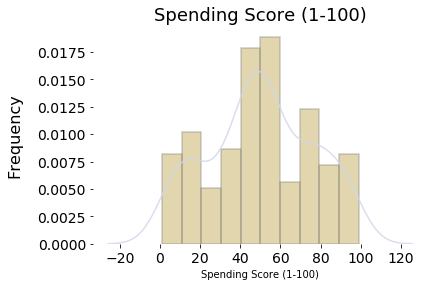

In [16]:
graph_histo(spending)

Then, we'll check **Age**.

In [17]:
age = customers["Age"]

In [18]:
statistics(age)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Age,38.85,13.934041,36.0,194.1575


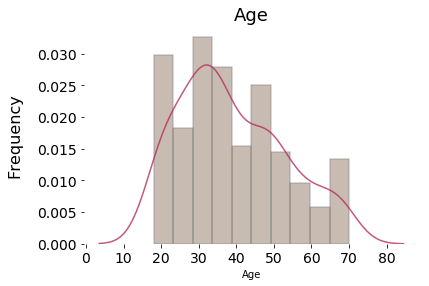

In [19]:
graph_histo(age)

Finally, we'll explore **Annual Income** variable.

In [20]:
income = customers["Annual Income (k$)"]

In [21]:
statistics(income)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Annual Income (k$),60.56,26.198977,61.5,686.3864


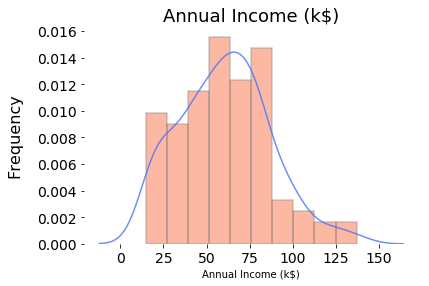

In [22]:
graph_histo(income)

In [23]:
gender = customers["Gender"]

In [24]:
statistics(gender)

,Gender
Female,112
Male,88


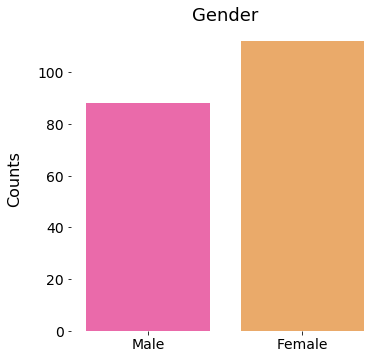

In [25]:
graph_histo(gender)

#### Correlation between parameteres

Also, we will analyze the correlation between the numeric parameters. For that aim, we'll use the `pairplot` seaborn function. We want to see whether there is a difference between gender. So, we are going to set the `hue` parameter to get different colors for points belonging to female or customers.

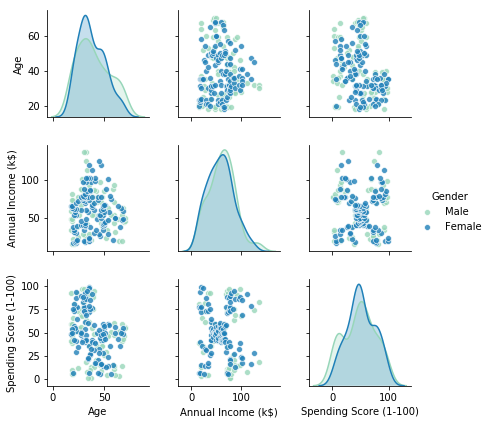

In [26]:
sns.pairplot(customers, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               hue = "Gender", 
               kind= "scatter",
               palette = "YlGnBu",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});

#### Why is it important to look into the descriptive statistics, distribution and correlation between variables?

In order to apply K-means, we need to meet the algorithm assumptions. 
  
K-means assumes:

- **Cluster's shape**: The variance of the distribution is spherical meaning that clusters have a spherical shape. In order for this to be true, all variables should be normally distributed and have the same variance.
- **Clusters' Size**: All clusters have the same number of observations.
- **Relationship between variables**: There is little or no correlation between the variables.

### Dimensionality reduction

After we checked that we can apply k-means, we can apply Principal Component Analysis (PCA) to discover which dimensions best maximize the variance of features involved.

#### Principal Component Analysis (PCA)

First, we'll transform the categorical variable into two binary variables.

In [37]:
customers["Male"] = customers.Gender.apply(lambda x: 0 if x == "Male" else 1)

In [38]:
customers["Female"] = customers.Gender.apply(lambda x: 0 if x == "Female" else 1)

Then, we are going to select from the dataset all the useful columns. Customer ID is not a useful feature. Gender will split it into two binaries categories. It should not appear in the final dataset

In [44]:
X = customers.iloc[:, 2:]

In [45]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,Female
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In order to apply PCA, we are going to use the `PCA` function from sklearn module.

In [61]:
# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(X)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [67]:
print(pca.components_)

[[ 3.32728191e-04 -1.88977291e-01  5.88622756e-01  7.86009366e-01]
 [-1.57871198e-03  1.30961404e-01  8.08388308e-01 -5.73894557e-01]]


In [68]:
print(pca.explained_variance_)

[700.26443231 684.33184134]


In [ ]:
def draw_pca_vectors(x, y, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [62]:
# Transform samples using the PCA fit
pca_2d = pca.transform(X)

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### K-means clustering 

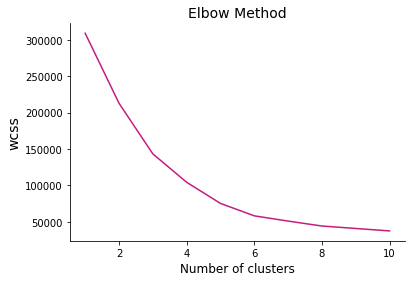

In [16]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show() 

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

y_means = kmeans.fit_predict(X)

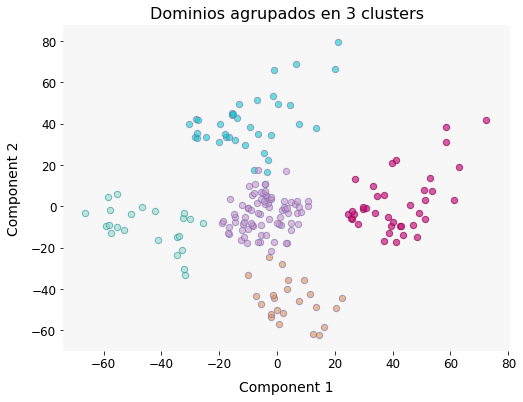

In [20]:
fig, ax = plt.subplots(figsize = (8, 6))

for i in range(0, pca_2d.shape[0]):
    if y_means[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="#99d8c9", s=40, edgecolors="#1c9099", alpha=0.6)
    elif y_means[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="#c51b8a", s=40, edgecolors="#980043", alpha=0.7)
    elif y_means[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="#c994c7", s=40, edgecolors="#756bb1", alpha=0.6)
    elif y_means[i] == 3:    
        c4 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="#0bd0cb", s=40, edgecolors="#756bb1", alpha=0.6)
    elif y_means[i] == 4:
        c5 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="#e0904e", s=40, edgecolors="#756bb1", alpha=0.6)
        
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title('Dominios agrupados en 5 clusters', size=16)

ax.set_facecolor("#f7f7f7")

plt.show()

In [23]:
X2 = customers.iloc[:, 2:]

In [24]:
x = []
y = []
z = []
for i in range(0, pca_2d.shape[0]):
    x.append(pca_2d[i,0])
    y.append(pca_2d[i,1])
    z.append(i)

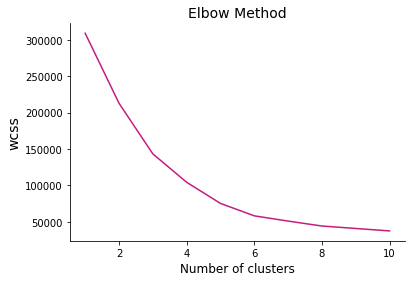

In [25]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show() 

In [35]:
kmeans2 = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

y_means2 = kmeans2.fit_predict(X2)

In [36]:
pca2 = PCA(n_components=2).fit(X2)

In [37]:
pca_2d2 = pca2.transform(X)

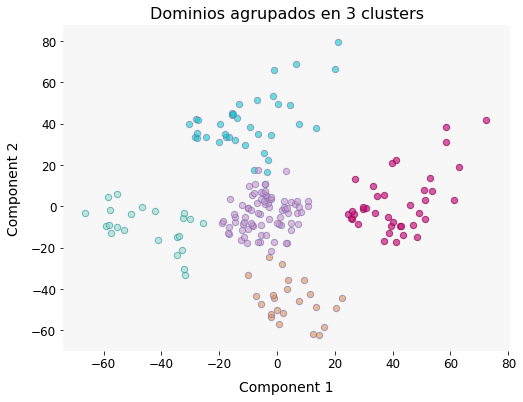

In [39]:
fig, ax = plt.subplots(figsize = (8, 6))

for i in range(0, pca_2d.shape[0]):
    if y_means2[i] == 0:
        c1 = plt.scatter(pca_2d2[i,0], pca_2d2[i,1], c="#99d8c9", s=40, edgecolors="#1c9099", alpha=0.6)
    elif y_means2[i] == 1:
        c2 = plt.scatter(pca_2d2[i,0], pca_2d2[i,1], c="#c51b8a", s=40, edgecolors="#980043", alpha=0.7)
    elif y_means2[i] == 2:
        c3 = plt.scatter(pca_2d2[i,0], pca_2d2[i,1], c="#c994c7", s=40, edgecolors="#756bb1", alpha=0.6)
    elif y_means2[i] == 3:    
        c4 = plt.scatter(pca_2d2[i,0], pca_2d2[i,1], c="#0bd0cb", s=40, edgecolors="#756bb1", alpha=0.6)
    elif y_means2[i] == 4:
        c5 = plt.scatter(pca_2d2[i,0], pca_2d2[i,1], c="#e0904e", s=40, edgecolors="#756bb1", alpha=0.6)
        
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title('Dominios agrupados en 3 clusters', size=16)

ax.set_facecolor("#f7f7f7")

plt.show()

In [51]:
X4 = customers.iloc[:, 3:]

In [52]:
kmeans4 = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

y_means4 = kmeans2.fit_predict(X4)

In [76]:
labels = [customers["CustomerID"][i] for i in range(customers.shape[0])]

In [47]:
N = len(x)
colors = np.random.rand(N)*20
sz = np.random.rand(N)*30
#colors = [abs(j)*20 for j in x]
#sz = np.random.rand(N)*30


init_notebook_mode(connected=True)



data = [
    go.Scatter(
        x=x,
        y=y,
        mode='markers',
        text=labels,
        marker={'size': sz,
                'color': colors,
                'opacity': 0.6,
                'colorscale': 'Viridis'
                       })
        ]

layout = go.Layout(
    title='Desliza por encima de un punto para ver el dominio'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='my_plot')

NameError: name 'labels' is not defined

In [ ]:
plotly.offline.plot(fig, filename='name.html') 